In [6]:
"""
Notebook conclusion - my wishart 
"""

import pyext.src.lpdf as lpdf
import pyext.src.lpmf as lpmf
import pyext.src.log_prob as lprob
import pyext.src.pynet_rng as rv
import pyext.src.check as check
import pyext.src.workspace as ws

import jax.numpy as jnp
from jax.scipy.linalg import inv, cholesky

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [284]:

p = 2
cov = np.eye(p)
cov[np.tril_indices(p, k=-1)] = 0.3
cov = cov + cov.T
check.cov(cov)
df = 2
V = (1/ p) * inv(cov)

X = rv.wishart(ws.key, V, df, p)  
X = np.array(X)
del cov
check.cov(X)
check.cov(V)
lwish = lprob.wishart(p)

def scale(X, a):
    X = np.array(X)
    X = X + a/2
    X[np.diag_indices(len(X))] = X[np.diag_indices(len(X))] + a
    return X



def mds(A, B):
    """
    return the mean distance squared
    """
    return jnp.mean(jnp.power(A, 2) - jnp.power(B, 2))
    

def do_experiment(X, V, df, xlim, stepsize):
    xs = np.arange(xlim[0], xlim[1], stepsize)
    ys = np.zeros(len(xs))
    ds = np.zeros(len(xs))
    trues = np.zeros(len(xs))
    
    Xog = np.array(X)
    V = np.array(V)
    check.cov(Xog)
    check.cov(V)

    for i, exp in enumerate(xs):
        X = scale(Xog, exp)
        check.cov(X)
        ys[i] = np.array(lwish(X, V, df))
        ds[i] = mds(X, V)
        
        trues[i] = wishart.logpdf(X, df=df, scale=V)
    return xs, ys, ds, trues

def plot_wish_lpdf(xs, ys, xlabel="scale factor", ylabel="log probability"):
    plt.plot(xs, ys, 'k.')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
def pairplot(xs, ys, ds, X=X, V=V, df=df):
    fig, axs = plt.subplots(1, 2)
    ax = axs[0]
    ax.plot(xs, ys, 'k.')
    ax.set_ylabel("log probability")
    ax.set_xlabel("scale factor")
    
    ax = axs[1]
    ax.plot(ds, ys, 'k.')
    ax.set_xlabel("mean distance squared")
    y = lwish(X, V, df)
    ax.plot(mds(X, V), y, 'co', label="true mds")
    ax.legend()
    plt.suptitle(f"df = {df}")
    return ax

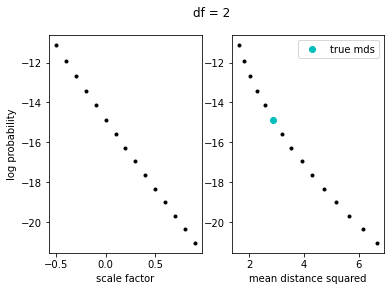

In [285]:
# Setting the df parameter
# The degrees of freedom
xs, ys, ds, trues = do_experiment(X, V, 2, (-0.5, 1), stepsize=0.1)
ax = pairplot(xs, ys, ds, df=2)

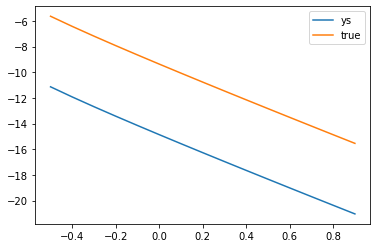

In [289]:
plt.plot(xs, ys, label="ys")
plt.plot(xs, trues, label="true")
plt.legend()
plt.show()

<AxesSubplot:xlabel='mean distance squared'>

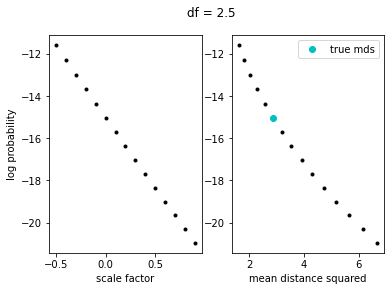

In [249]:
# Setting the df parameter
# The degrees of freedom
xs, ys, ds = do_experiment(X, V, 2.5, (-0.5, 1), stepsize=0.1)
pairplot(xs, ys, ds, df=2.5)

<AxesSubplot:xlabel='mean distance squared'>

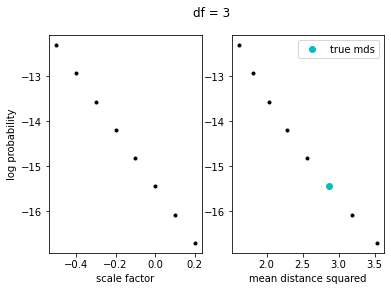

In [251]:
xs, ys, ds = do_experiment(X, V, 3, (-0.5, 0.25), 0.1)
pairplot(xs, ys, ds, df=3)

In [298]:
?np.log

<AxesSubplot:xlabel='mean distance squared'>

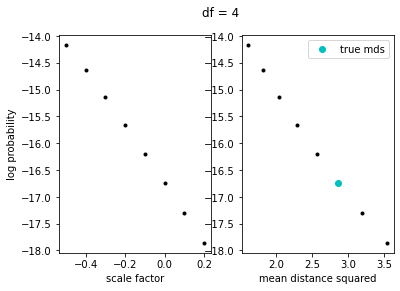

In [254]:
xs, ys, ds = do_experiment(X, V, 4, (-0.5, 0.25), 0.1)
pairplot(xs, ys, ds, df=4)

<AxesSubplot:xlabel='mean distance squared'>

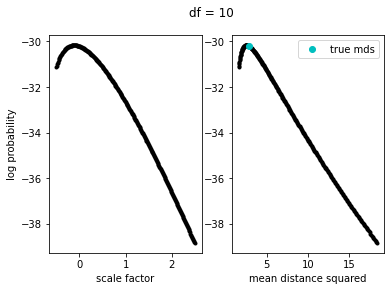

In [290]:
xs, ys, ds, trues = do_experiment(X, V, 10, (-0.5, 2.5), 0.01)
pairplot(xs, ys, ds, df=10)

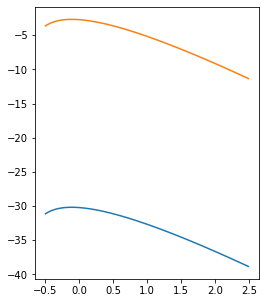

In [294]:
plt.figure(figsize=(4, 5))
plt.plot(xs, ys, label="ys")
plt.plot(xs, trues, label="true")


<AxesSubplot:xlabel='mean distance squared'>

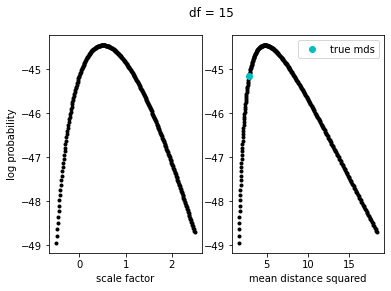

In [296]:
xs, ys, ds, trues = do_experiment(X, V, 15, (-0.5, 2.5), 0.01)
pairplot(xs, ys, ds, df=15)

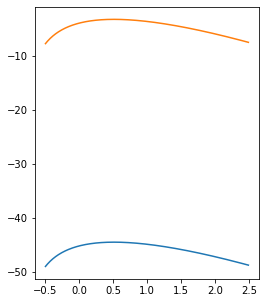

In [297]:
plt.figure(figsize=(4, 5))
plt.plot(xs, ys, label="ys")
plt.plot(xs, trues, label="true")

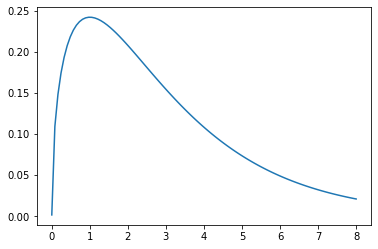

In [271]:

from scipy.stats import wishart, chi2
x = np.linspace(1e-5, 8, 100)
w = wishart.pdf(x, df=3, scale=1); w[:5]

c = chi2.pdf(x, 3); c[:5]

plt.plot(x, w)

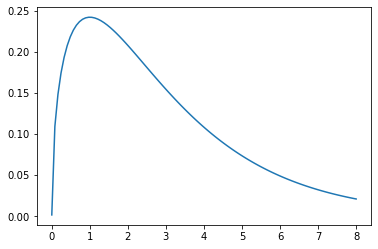

In [273]:
plt.plot(x, w)

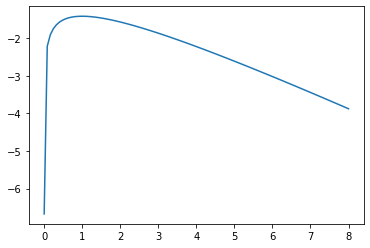

In [275]:
plt.plot(x, np.log(w))

In [279]:
?wishart.logpdf